## Gradient Boosting   Classification

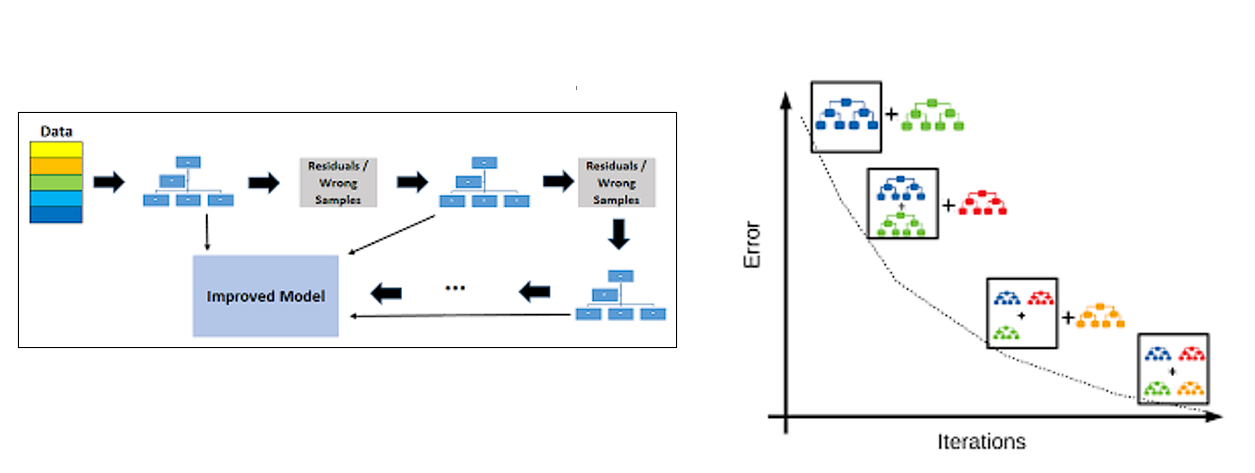

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Read the Dataset

In [2]:
import pandas as pd
df = pd.read_csv('drug200.csv')

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

## seprate dependent and independent features

In [6]:
X = df.drop(columns=['Drug'])
Y= df[['Drug']]

In [7]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [8]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


In [9]:
Y.value_counts()

Drug 
DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: count, dtype: int64

<Axes: title={'center': 'Count plot for Drug'}, xlabel='Drug'>

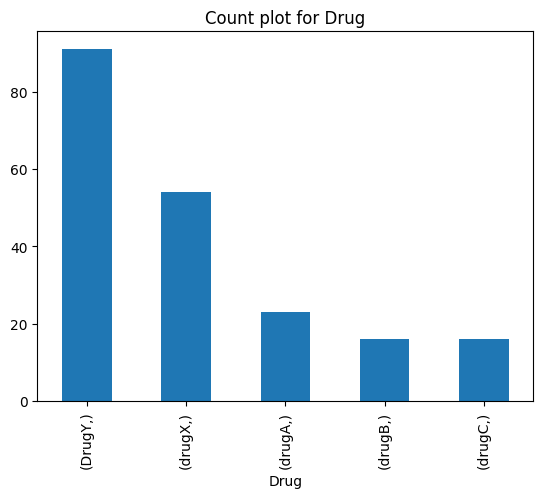

In [10]:
Y.value_counts().plot(kind= 'bar',title='Count plot for Drug')

## Apply label Encoding on Y label

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y['Drug'] = le.fit_transform(Y['Drug'])
Y.head()


,Drug
0,0
1,3
2,3
3,4
4,0


In [12]:
Y.value_counts()

Drug
0       91
4       54
1       23
2       16
3       16
Name: count, dtype: int64

## seprate cat and con from X

In [13]:
from PM2 import catconsep

In [14]:
cat,con = catconsep(X)

In [15]:
cat

['Sex', 'BP', 'Cholesterol']

In [16]:
con

['Age', 'Na_to_K']

## Creating a Pipeline

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [18]:
## Creating a num pipe
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                            ('scaler',StandardScaler())])

## Create a cat pipeline 
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])

## Combine both the pipeline
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])

In [19]:
x_pre = pre.fit_transform(X)
x_pre

array([[-1.29159102,  1.28652212,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.4151454 ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.82855818,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.46567567, -0.85908883,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-1.29159102, -0.28650033,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.26146916, -0.6571702 ,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [20]:
cols = pre.get_feature_names_out()
cols

array(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M',
       'cat__BP_HIGH', 'cat__BP_LOW', 'cat__BP_NORMAL',
       'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL'], dtype=object)

In [21]:
X_pre = pd.DataFrame(x_pre, columns=cols)
X_pre

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
195,0.708057,-0.626917,1.0,0.0,0.0,1.0,0.0,1.0,0.0
196,-1.715759,-0.565995,0.0,1.0,0.0,1.0,0.0,1.0,0.0
197,0.465676,-0.859089,0.0,1.0,0.0,0.0,1.0,1.0,0.0
198,-1.291591,-0.286500,0.0,1.0,0.0,0.0,1.0,0.0,1.0


## Train Test split

In [22]:
from sklearn.model_selection import  train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.33,random_state=21)


In [23]:
xtrain.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
7,-0.200874,-0.700468,0.0,1.0,0.0,1.0,0.0,1.0,0.0
95,-0.503851,-0.646762,0.0,1.0,0.0,1.0,0.0,0.0,1.0
156,-0.806828,-0.674101,0.0,1.0,1.0,0.0,0.0,0.0,1.0
175,1.738179,0.314121,1.0,0.0,1.0,0.0,0.0,1.0,0.0
140,0.283889,-1.362151,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [24]:
ytrain.head()

,Drug
7,3
95,4
156,1
175,0
140,1


In [25]:
xtest.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
144,-0.322065,-0.891007,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9,-0.079683,0.455672,0.0,1.0,0.0,1.0,0.0,0.0,1.0
17,-0.079683,-0.293162,0.0,1.0,1.0,0.0,0.0,1.0,0.0
20,0.768653,0.422366,0.0,1.0,0.0,1.0,0.0,0.0,1.0
45,1.314011,-1.107081,1.0,0.0,0.0,0.0,1.0,0.0,1.0


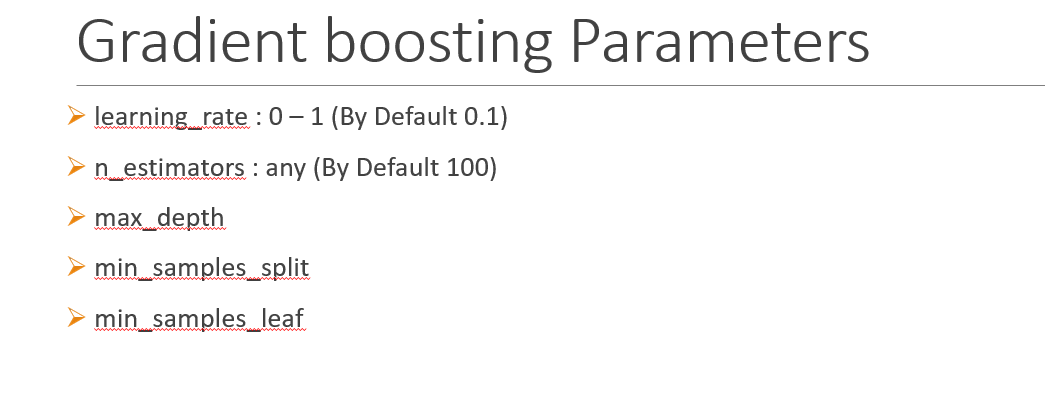

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate=0.5,n_estimators=2,max_depth=5,min_samples_split=2,min_samples_leaf=5)
model.fit(xtest,ytest)

GradientBoostingClassifier(learning_rate=0.5, max_depth=5, min_samples_leaf=5,
                           n_estimators=2)

## Check model accuracy in traning and testing 

In [27]:
model.score(xtrain,ytrain)

0.9850746268656716

In [28]:
model.score(xtest,ytest)

1.0

## Hyperparameter Tunning 

In [29]:
params = {'learning_rate':[0.01,0.1,0.15,0.2],
          'n_estimators':[10,20,50,100,200],
          'max_depth':[2,3,4,5,6,7,8,9,10,11],
          'min_samples_split':[3,4,5,6,7,8,9,10,11]}

In [30]:
from sklearn.model_selection import RandomizedSearchCV
gbc = GradientBoostingClassifier()
rscv = RandomizedSearchCV(gbc,param_distributions=params,cv=5,scoring='f1_macro')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8,
                                                              9, 10, 11],
                                        'n_estimators': [10, 20, 50, 100, 200]},
                   scoring='f1_macro')

In [31]:
rscv.best_params_

{'n_estimators': 50,
 'min_samples_split': 4,
 'max_depth': 10,
 'learning_rate': 0.1}

In [32]:
rscv.best_score_

0.9809185185185185

In [33]:
best_gbc = rscv.best_estimator_
best_gbc

GradientBoostingClassifier(max_depth=10, min_samples_split=4, n_estimators=50)

## Check model score  in training amd testing

In [34]:
best_gbc.score(xtrain,ytrain)

1.0

In [35]:
best_gbc.score(xtest,ytest)

0.9242424242424242

## Predicting data for train and test

In [36]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [37]:
ypred_tr[0:5]

array([3, 4, 1, 0, 1])

In [38]:
ytrain.head()

,Drug
7,3
95,4
156,1
175,0
140,1


In [39]:
ypred_ts[0:5]

array([1, 0, 1, 0, 4])

In [40]:
ytest.head()

,Drug
144,1
9,0
17,1
20,0
45,4


## Check Confusion matrix for test

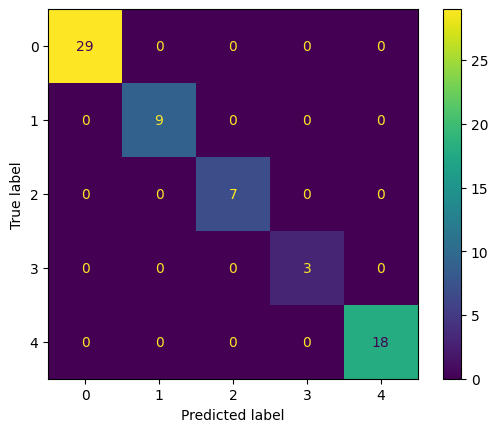

In [41]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=model.classes_)
cfd.plot()

## Print Classification  Report|

In [42]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00        18

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



## Getting original labels for train and test data

In [43]:
ypred_tr_lb = le.inverse_transform(ypred_tr)
ypred_ts_lb = le.inverse_transform(ypred_ts)

In [44]:
ypred_tr_lb

array(['drugC', 'drugX', 'drugA', 'DrugY', 'drugA', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'drugX', 'DrugY', 'drugX', 'drugX', 'drugX',
       'DrugY', 'DrugY', 'DrugY', 'drugC', 'DrugY', 'DrugY', 'drugC',
       'DrugY', 'DrugY', 'drugB', 'drugX', 'drugB', 'drugA', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugB', 'drugX', 'drugA',
       'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'drugX', 'drugX', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'drugC', 'drugB', 'drugX', 'drugC', 'drugX',
       'drugX', 'DrugY', 'drugX', 'drugC', 'DrugY', 'drugX', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'DrugY',
       'drugA', 'drugC', 'drugB', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugA',
       'drugX', 'drugX', 'drugA', 'DrugY', 'drugC', 'drugX', 'drugA',
       'drugX', 'drugA', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'Dru

In [45]:
ypred_ts_lb

array(['drugA', 'DrugY', 'drugA', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'DrugY', 'drugX', 'drugB', 'DrugY', 'drugA', 'DrugY', 'drugB',
       'DrugY', 'DrugY', 'drugX', 'drugA', 'DrugY', 'DrugY', 'drugX',
       'drugC', 'DrugY', 'DrugY', 'DrugY', 'drugA', 'DrugY', 'drugC',
       'DrugY', 'drugB', 'DrugY', 'drugB', 'drugB', 'drugA', 'drugX',
       'drugX', 'drugX', 'drugX', 'drugB', 'drugX', 'drugC', 'DrugY',
       'drugX', 'drugA', 'drugA', 'drugB', 'DrugY', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugA', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'drugX'], dtype=object)

## Getting the features importances

In [46]:
imp = model.feature_importances_
imp = pd.Series(imp)
imp.index = xtrain.columns
imp = imp.sort_values(ascending = False)
imp

num__Na_to_K               0.593503
num__Age                   0.160173
cat__BP_NORMAL             0.118825
cat__BP_HIGH               0.093341
cat__BP_LOW                0.021036
cat__Cholesterol_NORMAL    0.013123
cat__Sex_F                 0.000000
cat__Sex_M                 0.000000
cat__Cholesterol_HIGH      0.000000
dtype: float64

<Axes: title={'center': 'Features Importance'}>

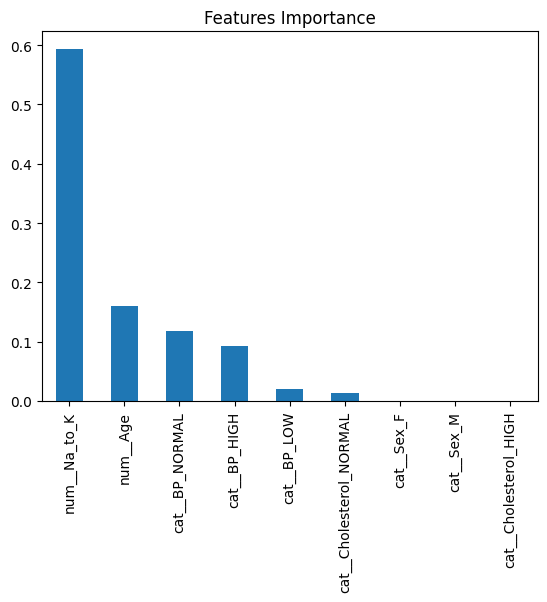

In [47]:
imp.plot(kind='bar',title='Features Importance')


## Prescribingthe drugs for new patients

In [48]:
X.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')

In [49]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [50]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [51]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [56]:
def predict_drug(le, pre, model):
    # Take inputs from users
    age = input('Please enter your age : ')
    gender = input('Please enter Gender M or F : ')
    bp = input('Please enter BP HIGH, LOW or NORMAL : ')
    chol = input('Please enter Cholestrol HIGH or NORMAL : ')
    nak = float(input('Please enter Na to K ratio : '))
    # Convert inputs to dataframe
    xnew = pd.DataFrame([age, gender, bp, chol, nak]).T
    xnew.columns = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
    print('Dataframe before preprocessing : \n')
    display(xnew)
    # Preprocess the dataset
    xnew_pre = pre.transform(xnew) 
    xnew_pre = pd.DataFrame(xnew_pre, columns=pre.get_feature_names_out())
    print('\n===============================================================\n')
    print('Dataframe after pre-processing : \n')
    display(xnew_pre)
    # Prediction of datapoint
    pred = model.predict(xnew_pre)
    pred_lb = le.inverse_transform(pred)[0]
    # Probability
    prob = model.predict_proba(xnew_pre).max()
    # Print the resutls
    print(f'Predicted Drug : {pred_lb} with probability : {prob:.4f}')
    return pred_lb, prob

In [57]:
predict_drug(le,pre,model)

Dataframe before preprocessing : 



,Age,Sex,BP,Cholesterol,Na_to_K
0,22,M,HIGH,NORMAL,45.0




Dataframe after pre-processing : 



,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.352186,4.012771,0.0,1.0,1.0,0.0,0.0,0.0,1.0


Predicted Drug : DrugY with probability : 0.8931


('DrugY', 0.893107014781652)